In [1]:
import torch
import torchvision
import torchvision.models as models
from torchvision import transforms
from torchvision.models.resnet import ResNet50_Weights
import lightning.pytorch as pl
import sys
import os
import cv2

from mymodels import Model_Wrapper, Preprocess
from myutils import View, sample_imgs_list, compare_ds

In [2]:
from ultralytics import YOLO

In [3]:
# configs to speed up training
torch.set_float32_matmul_precision('medium')
torch.backends.cuda.matmul.allow_tf32 = True
torch.backends.cudnn.allow_tf32 = True

In [4]:
model = YOLO('yolov8s.pt', )  # get pretrained model

In [5]:
PATH_TO_COCO = '/f_storage/datasets/coco/2017/val2017'
PATH_TO_IMAGENET = '../../datasets/imagenet/2012/'
NUM_IMG_EVAL = 10000
prep = Preprocess(PATH_TO_IMAGENET, (640, 640), dataset_type='imagenet', shuffle=False, batch_size=8)
preview_img_slice = slice(00000, 50000, 10000)
%matplotlib inline

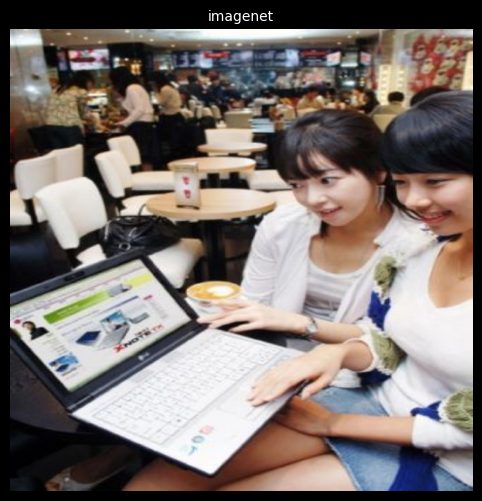

In [6]:
prep.reset_trans()
imgnet = prep.get_loader()
img = sample_imgs_list(imgnet, slice(31000,31001))

View.compare_color([img], ['imagenet'], figsize=(12,6))

2023-04-02 14:34:52.064773: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-02 14:34:52.216587: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-04-02 14:34:52.694020: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/jon/.local/lib/python3.10/site-packages/cv2/../../lib64:
2023-04-02 14:34:52.694077: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; 

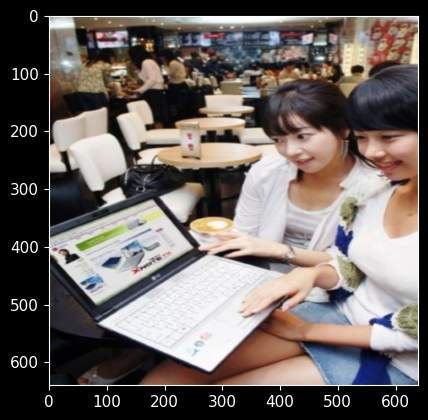

In [7]:
pil = transforms.ToPILImage(mode='RGB')(img[0])

from matplotlib import pyplot as plt
plt.imshow(pil)

results = model(pil)

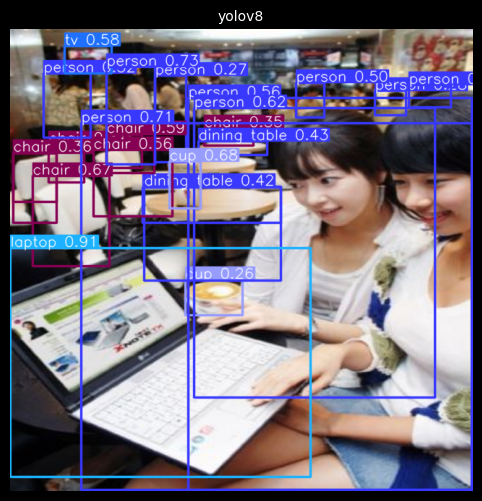

In [10]:
# for result in results:
#     print(result.boxes.xyxy)

tmp = results[0].orig_img[:, :, 0].copy()
results[0].orig_img[:, :, 0] = results[0].orig_img[:, :, 2]
results[0].orig_img[:, :, 2] = tmp

plot = results[0].plot()

View.compare_color(plot, ['yolov8'], figsize=(12,6))